In [38]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

07번 참가자 Food log 날짜가 범위에서 벗어남.  
  
덱스콤 실제 데이터 범위 - 8 days  
2020-03-14 12:42:19  
2020-03-22 11:06:57  
  
Food Log - 8 days  
10/16/2019 13:44  
10/24/2019 8:30  

In [39]:
fl_df = pd.read_csv('../big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/007/Food_Log_007.csv')

fl_df['date']=pd.to_datetime(fl_df['date'])
fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'])

In [40]:
new_start = pd.Timestamp("2020-03-14 13:44:00")
old_start = pd.Timestamp("2019-10-16 13:44:00")

# 시간 차이 계산
time_difference = new_start - old_start

# 시간 범위 조정
fl_df['time_begin'] = fl_df['time_begin'] + time_difference

In [41]:
dexcom_df = pd.read_csv('../big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/007/Dexcom_007.csv')
dexcom_df.drop(dexcom_df.loc[:11].index, inplace=True)
dexcom_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)
dexcom_df['datetime']=pd.to_datetime(dexcom_df['datetime'])

In [42]:
dexcom_df.iloc[0]['datetime']

Timestamp('2020-03-14 12:47:18')

## 2020-03-14

Index                                         13
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                       93.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)           9600.0
Name: 2020-03-14 12:47:18, dtype: object


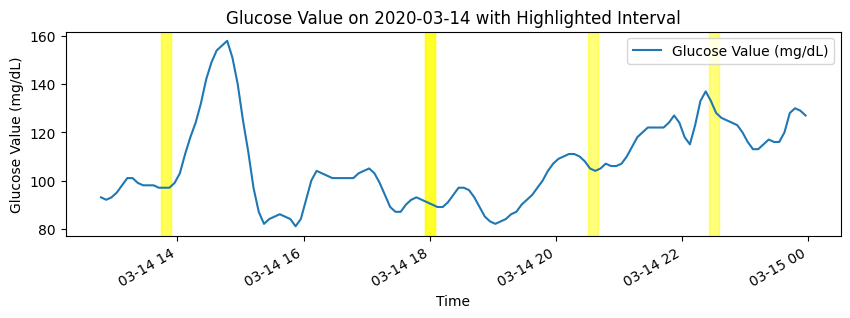

In [43]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-14 00:00:00') & (dexcom_df['datetime'] <= '2020-03-14 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-14 00:00:00') & (fl_df['time_begin'] <= '2020-03-14 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-14 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-03-15

Index                                        148
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                      125.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)          50099.0
Name: 2020-03-15 00:02:16, dtype: object


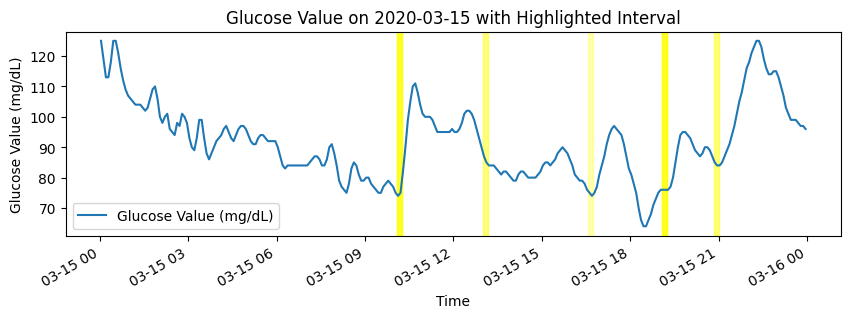

In [44]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-15 00:00:00') & (dexcom_df['datetime'] <= '2020-03-15 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-15 00:00:00') & (fl_df['time_begin'] <= '2020-03-15 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-15 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-03-16

Index                                        436
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                       95.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)         136497.0
Name: 2020-03-16 00:02:15, dtype: object


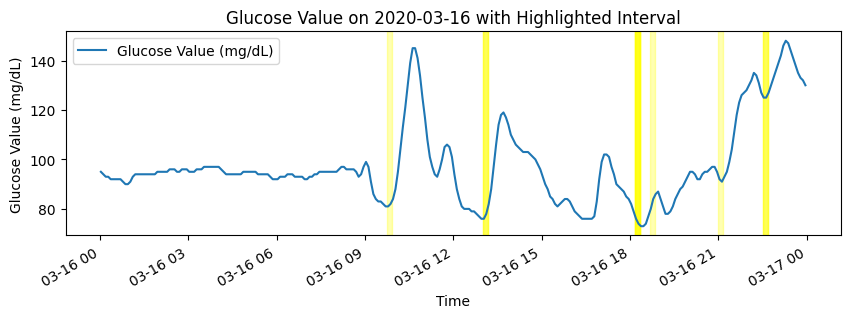

In [45]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-16 00:00:00') & (dexcom_df['datetime'] <= '2020-03-16 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-16 00:00:00') & (fl_df['time_begin'] <= '2020-03-16 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-16 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-03-17

Index                                        724
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                      128.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)         222895.0
Name: 2020-03-17 00:02:13, dtype: object


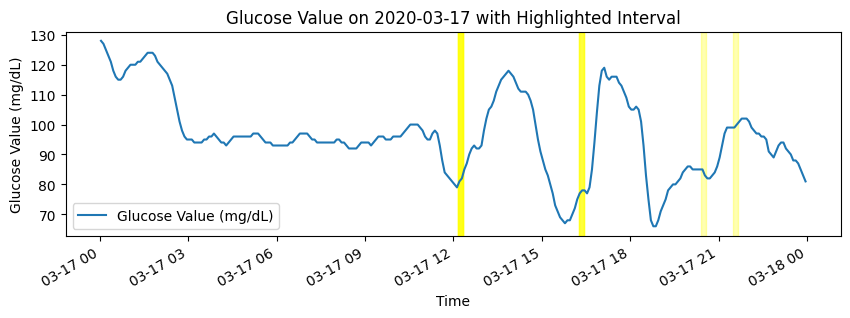

In [46]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-17 00:00:00') & (dexcom_df['datetime'] <= '2020-03-17 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-17 00:00:00') & (fl_df['time_begin'] <= '2020-03-17 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-17 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-03-18

Index                                       1012
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                       82.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)         309292.0
Name: 2020-03-18 00:02:09, dtype: object


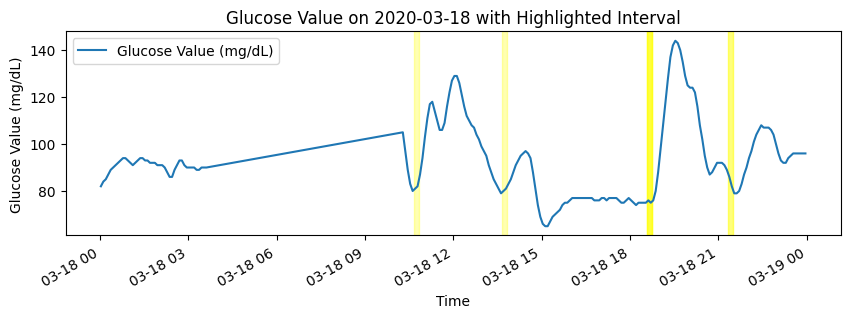

In [47]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-18 00:00:00') & (dexcom_df['datetime'] <= '2020-03-18 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-18 00:00:00') & (fl_df['time_begin'] <= '2020-03-18 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-18 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-03-19

Index                                       1221
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                       96.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)         395690.0
Name: 2020-03-19 00:02:06, dtype: object


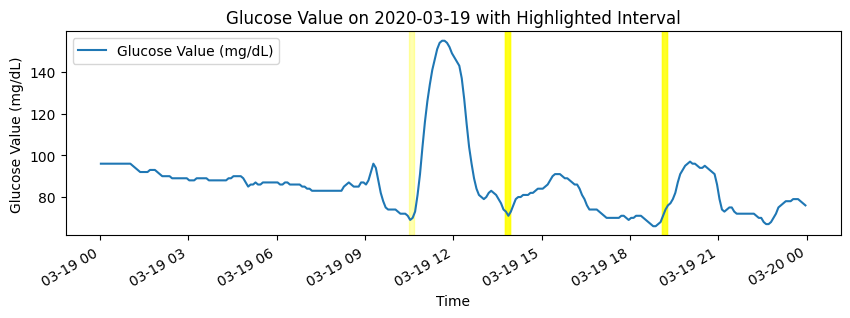

In [48]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-19 00:00:00') & (dexcom_df['datetime'] <= '2020-03-19 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-19 00:00:00') & (fl_df['time_begin'] <= '2020-03-19 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-19 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-03-20

Index                                       1509
Event Type                                   EGV
Event Subtype                                NaN
Patient Info                                 NaN
Device Info                                  NaN
Source Device ID                      Android G6
Glucose Value (mg/dL)                       76.0
Insulin Value (u)                            NaN
Carb Value (grams)                           NaN
Duration (hh:mm:ss)                          NaN
Glucose Rate of Change (mg/dL/min)           NaN
Transmitter Time (Long Integer)         482088.0
Name: 2020-03-20 00:02:04, dtype: object


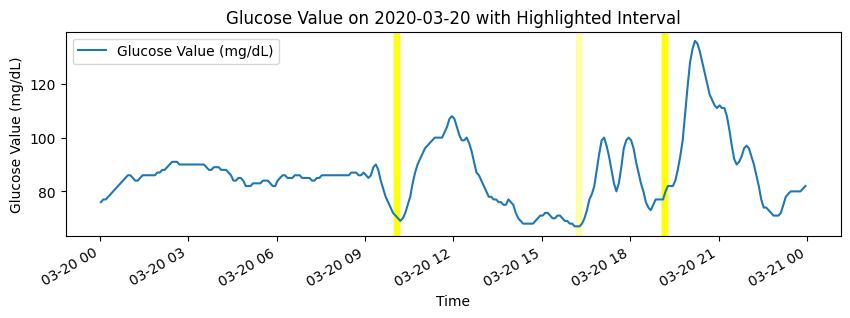

In [49]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-03-20 00:00:00') & (dexcom_df['datetime'] <= '2020-03-20 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-03-20 00:00:00') & (fl_df['time_begin'] <= '2020-03-20 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조 (오후 2시부터 오후 6시)
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-03-20 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()